In [7]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

In [8]:
def sum_curr(X, G, a):
    ret = 0
    for x in X:
        ret += G[a][x]
    
    return ret

In [9]:
def alg2(G, k):
    R = [i for i in range(len(G[0]))]
    X = []
    c = 0
    for i in range(k):
        prod = 1
        #argmax_(g in R)(pi_(i in N(agents)) v_i(g + x) + 1)
        for a in range(len(G)):
            prod *= (G[a][0] + sum_curr(X, G, a) + 1)**(1/len(G))
            
        max_good = (R[0], prod)
        
        for j in range(1, len(R)):
            prod = 1
            for a in range(len(G)):
                prod *= (G[a][R[j]] + sum_curr(X, G, a) + 1)**(1/len(G))
        
            if max_good[1] < prod:
                max_good = (R[j], prod)
                
        R.remove(max_good[0])
        X.append(max_good[0])

    return X


In [10]:
def AlgGreedy(G, k):
    n = len(G)
    r = k // n
    allocs = []
    for i in range(n):
        allocs.append(Maximize(G[i], r))
    all_alloc = allocs[0]
    
    for i in range(len(allocs)):
        all_alloc = list(set(all_alloc) | set(allocs[i]))
        
    return all_alloc

In [11]:
def Maximize(arr, k):
    if k >= len(arr):
        return list(range(len(arr)))

    min_heap = []

    for index, value in enumerate(arr):
        if len(min_heap) < k:
            heapq.heappush(min_heap, (value, index))
        elif value > min_heap[0][0]:
            heapq.heapreplace(min_heap, (value, index))

    indices = [index for _, index in min_heap]

    return indices

In [16]:
def nw(goods, rows, cols):
    mask = [0] * cols

    for i in range(len(goods)):
        mask[goods[i]] = 1

    mask = np.asarray(mask)

    nsw = 1
    for agent in range(rows):
        nsw *= ((np.dot(mask, array_2d[agent]) + 1))**(1/rows)

    #nsw = nsw ** (1/rows)
    return nsw

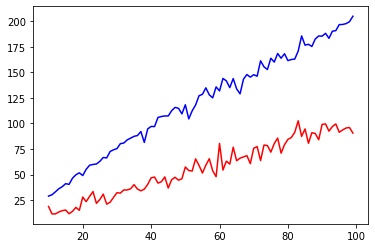

In [20]:
nw1 = []
nw2 = []
agents = 10
goods = 100
for i in range(agents, 100):
    array_2d = np.random.randint(5, size=(agents, goods))
    
    goods2 = alg2(array_2d, i)
    goods1 = AlgGreedy(array_2d, i)
    
    nw1.append(nw(goods1, agents, goods))
    nw2.append(nw(goods2, agents, goods))

tmp = [_ for _ in range(agents, len(nw1) + agents)]

plt.plot(tmp, nw1, color="red")
plt.plot(tmp, nw2, color="blue")
plt.show()

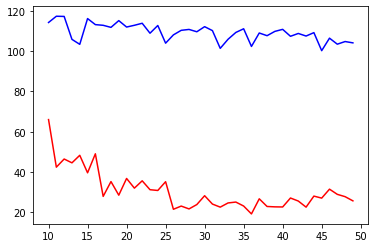

In [23]:
nw1 = []
nw2 = []
agents = 10
goods = 100
for tmp_agents in range(agents, int(goods/2)):
    
    array_2d = np.random.randint(5, size=(tmp_agents, goods))
    
    goods2 = alg2(array_2d, int(goods/2))
    goods1 = AlgGreedy(array_2d, int(goods/2))
    
    nw1.append(nw(goods1, tmp_agents, goods))
    nw2.append(nw(goods2, tmp_agents, goods))

tmp = [_ for _ in range(agents, len(nw1) + agents)]

plt.plot(tmp, nw1, color="red")
plt.plot(tmp, nw2, color="blue")
plt.show()